# A notebook to help marine scientists in fine-tuning ML models for classification tasks based on annotated datasets from squidle.org

In [1]:
from scripts.requests import SQAPI_requests,annotation_set
from scripts.analysis import analysis
from scripts.utils import utils, FineTuningParameters
from scripts.config import Configuration_Classification 
from scripts.fine_tuning import FineTuning
import os

# Loading configurations

In [2]:
config = Configuration_Classification('config_classification.yaml')


set_demo = True #if split annotaton set into one set for finetuning and one set for inference (As if unlabelled subset as a demo)


# Loading API Token and Annotations


In [3]:

utils = utils(config)
SQAPI_requests = SQAPI_requests(config)
SQAPI_requests.load_annotations()


API Token was loaded successfully ✅
HTTP-GET: https://squidle.org/api/annotation_set/5868/export?include_columns=["label.id","label.uuid","label.name","label.lineage_names","comment","needs_review","tag_names","updated_at","point.id","point.x","point.y","point.t","point.is_targeted","point.media.id","point.media.key","point.media.path_best","point.pose.timestamp","point.pose.lat","point.pose.lon","point.pose.alt","point.pose.dep","point.media.deployment.key","point.media.deployment.campaign.key"]&q={"filters":[{"name":"label_id","op":"is_not_null"}]} ... ✅ | 202 | Done in 1.64 s
Task queued (ID:80eacb04-e1e6-41d3-8bc2-dd5a3870aa2c) | checking status...


data.query_to_dicts: 100%|██████████| 6011/6011 [00:58<00:00, 101.99it/s]    

HTTP-GET: https://squidle.org/task/80eacb04-e1e6-41d3-8bc2-dd5a3870aa2c/result ...

data.query_to_dicts: 100%|██████████| 6011/6011 [01:01<00:00, 97.34it/s] 

 ✅ | 200 | Done in 2.81 s


In [4]:
analysis = analysis(config)

if set_demo:
    df_training, df_inference = analysis.stratified_split(SQAPI_requests.data, label_col='label.name')
    SQAPI_requests.data = df_training
    


Sampled: 1504 rows, Remaining: 4507 rows


In [5]:
analysis.data = SQAPI_requests.data
annotation_set = annotation_set(config,SQAPI_requests.data)
whole_frame_annotations = annotation_set.get_whole_frame_annotations()
print(whole_frame_annotations)
point_annotations = annotation_set.get_point_annotations()
print(point_annotations)

if set_demo:
    annotation_set.download_set(df = df_training)
    annotation_set.download_set(df = df_inference,suffix = "_inference")

else:

    annotation_set.download_set()

['Ecklonia radiata', 'Fine sand (no shell fragments)', 'Flat', 'High', 'Low (<1m)', 'Moderate (1-3m)', 'Mud / silt (<64um)', 'Sand / mud (<2mm)', 'Screwshells']
Dataframe does not contain point.x and point.y, therefore no point annotations
[]
     tag_names  needs_review                  updated_at  point.pose.dep  \
5544                   False  2021-09-09T05:00:54.615663       38.099506   
2723                   False  2021-09-09T04:41:08.649562       42.575355   
699                    False  2021-09-09T04:29:26.118803       35.307425   
705                    False  2021-09-09T04:25:02.931317       40.389188   
1765                   False  2021-09-09T04:33:01.416741       32.267262   
...        ...           ...                         ...             ...   
1546                   False  2021-09-09T04:32:21.234927       88.542001   
2084                   False  2021-09-09T04:34:48.652983       83.598624   
2234                   False  2021-09-09T04:38:41.038735       71.432311 

Download complete.
     tag_names  needs_review                  updated_at  point.pose.dep  \
1                      False  2021-09-09T04:21:53.125342       38.917431   
2                      False  2021-09-09T04:21:55.064899       81.858849   
3                      False  2021-09-09T04:21:57.014928       35.232236   
4                      False  2021-09-09T04:21:58.971822       77.372919   
6                      False  2021-09-09T04:22:02.856179       74.461453   
...        ...           ...                         ...             ...   
6006                   False  2021-09-09T05:03:39.688582       74.589557   
6007                   False  2021-09-09T05:03:43.024668       66.636412   
6008                   False  2021-09-09T05:03:43.474104       37.503691   
6009                   False  2021-09-09T05:03:45.259238       51.489917   
6010                   False  2021-09-09T05:03:47.010614       52.996945   

      point.pose.lon  point.pose.lat point.pose.timestamp  point.pos

Download complete.


# Visualizing the dataset (Zoom in and click on points to view images)


In [6]:
analysis.build_folium_map(labels=whole_frame_annotations)
analysis.show_folium_map()

In [7]:
utils.compute_dataset_statistics()

100%|██████████| 1504/1504 [00:11<00:00, 129.41it/s]

📊 Dataset Statistics:
  - Total Images: 1504
  - Number of Classes: 9
  - Class Distribution: {'Ecklonia radiata': 152, 'Fine sand (no shell fragments)': 33, 'Flat': 242, 'High': 365, 'Low (<1m)': 107, 'Moderate (1-3m)': 65, 'Mud _ silt (<64um)': 228, 'Sand _ mud (<2mm)': 146, 'Screwshells': 166}


# Showing random images

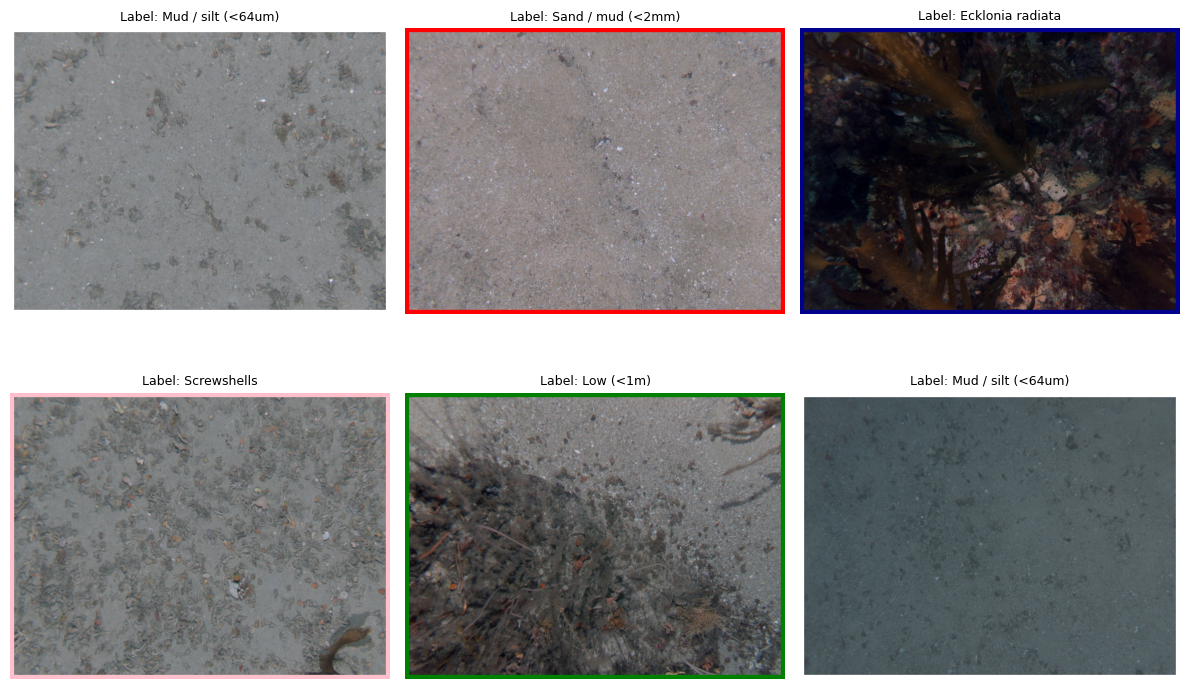

In [8]:
analysis.show_sample_images(labels=whole_frame_annotations)

In [9]:

finetuning_parameters = FineTuningParameters()
finetuning_parameters.display_widgets()
# Click Apply!

# Parameters for fine tuning

In [11]:

config_finetuning = finetuning_parameters.get_config()
fine_tuning = FineTuning(config,config_finetuning)


# Preprocessing the dataset

In [12]:
fine_tuning.preprocess_dataset()

Computing mean and std: 100%|██████████| 47/47 [00:06<00:00,  7.36it/s]

Dataset Mean: tensor([0.3149, 0.3224, 0.3264])
Dataset Std: tensor([0.0560, 0.0530, 0.0520])


# Loading the dataset

In [13]:
fine_tuning.load_dataset()


# Fine tuning the model

In [14]:
fine_tuning.fine_tune_model()

resnet18 Model loaded with pretrained weights from torchvision to cuda


Validation Epoch 1/50: 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]


Epoch 1/50, Train Loss: 67.5564, Train Accuracy: 30.59%, Valid Loss: 5.6746, Valid Accuracy: 62.67%
Model saved to checkpoints/model_Tasmania.pt


Validation Epoch 2/50: 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]


Epoch 2/50, Train Loss: 41.6847, Train Accuracy: 58.02%, Valid Loss: 4.3346, Valid Accuracy: 68.00%
Model saved to checkpoints/model_Tasmania.pt


Validation Epoch 3/50: 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]


Epoch 3/50, Train Loss: 32.5350, Train Accuracy: 67.83%, Valid Loss: 3.8090, Valid Accuracy: 72.00%
Model saved to checkpoints/model_Tasmania.pt


Validation Epoch 4/50: 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]


Epoch 4/50, Train Loss: 28.9604, Train Accuracy: 71.82%, Valid Loss: 3.6598, Valid Accuracy: 71.33%


Validation Epoch 5/50: 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]


Epoch 5/50, Train Loss: 26.8579, Train Accuracy: 72.32%, Valid Loss: 3.5493, Valid Accuracy: 73.33%
Model saved to checkpoints/model_Tasmania.pt


Validation Epoch 6/50: 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]


Epoch 6/50, Train Loss: 24.3494, Train Accuracy: 76.48%, Valid Loss: 3.4926, Valid Accuracy: 73.33%


Validation Epoch 7/50: 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]


Epoch 7/50, Train Loss: 19.3334, Train Accuracy: 82.21%, Valid Loss: 3.5417, Valid Accuracy: 72.00%


Validation Epoch 8/50: 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]


Epoch 8/50, Train Loss: 15.6785, Train Accuracy: 85.54%, Valid Loss: 3.1989, Valid Accuracy: 74.00%
Model saved to checkpoints/model_Tasmania.pt


Validation Epoch 9/50: 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]


Epoch 9/50, Train Loss: 13.3712, Train Accuracy: 87.86%, Valid Loss: 3.2365, Valid Accuracy: 72.67%


Validation Epoch 10/50: 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]


Epoch 10/50, Train Loss: 12.8182, Train Accuracy: 87.95%, Valid Loss: 3.2545, Valid Accuracy: 74.67%
Model saved to checkpoints/model_Tasmania.pt


Validation Epoch 11/50: 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


Epoch 11/50, Train Loss: 12.6329, Train Accuracy: 88.03%, Valid Loss: 3.6605, Valid Accuracy: 73.33%


Validation Epoch 12/50: 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 12/50, Train Loss: 9.9462, Train Accuracy: 90.94%, Valid Loss: 3.5960, Valid Accuracy: 73.33%


Validation Epoch 13/50: 100%|██████████| 5/5 [00:01<00:00,  4.00it/s]

Epoch 13/50, Train Loss: 7.3177, Train Accuracy: 93.68%, Valid Loss: 3.8388, Valid Accuracy: 72.00%
Early stopping triggered.
Fine-tuning complete!



# Evaluation on the test set


Evaluating on test set...


Testing: 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]


Classification Report:
                                precision    recall  f1-score   support

              Ecklonia radiata       0.83      0.94      0.88        16
Fine sand (no shell fragments)       0.33      0.25      0.29         4
                          Flat       0.57      0.77      0.65        22
                          High       0.79      0.59      0.68        39
                     Low (<1m)       0.60      0.60      0.60         5
               Moderate (1-3m)       0.50      0.57      0.53         7
            Mud _ silt (<64um)       0.76      0.73      0.74        22
             Sand _ mud (<2mm)       0.75      0.79      0.77        19
                   Screwshells       0.82      0.82      0.82        17

                      accuracy                           0.72       151
                     macro avg       0.66      0.67      0.66       151
                  weighted avg       0.73      0.72      0.71       151



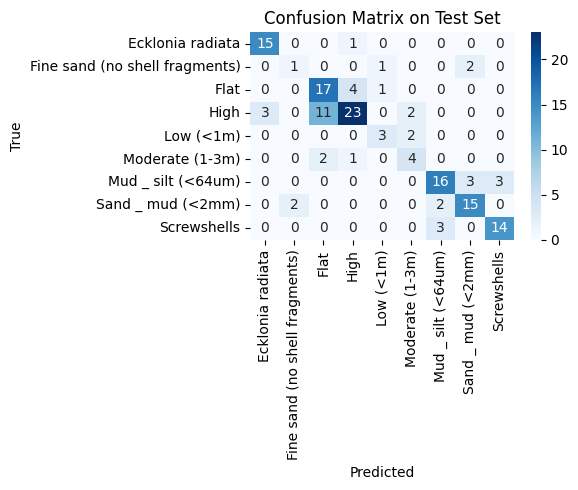

In [15]:
fine_tuning.evaluation()

# Do inference on the rest of dataset set
### These could be future unlabelled data, for the sake of this demo, I split the dataset into 25% for finetuning and 75% for the inference 

In [17]:
Unlabelled_data_dir=None #It will assume the directory of the inference set extracted above, change it to your directory of preference if desried
# Unlabelled_data_dir = 'Unlabelled_data_directory' #Replace with the directory containing unlabelled imagery to classify them (valid for wholeframe annotations)

fine_tuning.classify_images(whole_frame_annotations,point_annotations,image_dir=Unlabelled_data_dir)


Inferring...: 100%|██████████| 4507/4507 [00:42<00:00, 104.97it/s]
